In [3]:
import pandas as pd
import numpy as np

In [4]:
X=pd.read_csv("train_X.csv").values.T
Y=pd.read_csv("train_label.csv").values.T

In [5]:
import matplotlib.pyplot  as plt

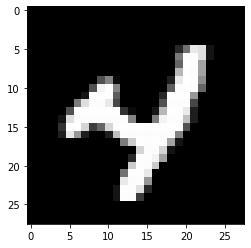

In [6]:
plt.imshow(X[:,450].reshape(28, 28), cmap = 'gray')
plt.show()

In [7]:
print(X.shape)
print(Y.shape)

(784, 999)
(10, 999)


In [8]:

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

def sigmoid(x):
    return 1/(1+np.exp(-x))


In [9]:
def relu_dervative(X):
    return  X < 1

def tanh_derivative(X):
    return 1-(X**2)
        

/

In [10]:
n_x=X.shape[0]
n_y=Y.shape[0]
n_h=100

n_h

100

In [11]:
def parameters(n_x,n_h,n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    return w1,b1,w2,b2

In [12]:
w1,b1,w2,b2=parameters(n_x,n_h,n_y)

print(w1.shape)
print(X.shape)


(100, 784)
(784, 999)


In [13]:
def forward_pro(w1,b1,w2,b2,X):
    z1=np.dot(w1,X)+b1
    a1=tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=sigmoid(z2)
    
    
    return z1,a1,z2,a2

In [35]:
def cost(Y,a2):
    m=Y.shape[1]
    cost = -(1/m)*np.sum(Y*np.log(a2)+((1-Y)*np.log(1-a2)))
    return cost
    
    

In [36]:
z1,a1,z2,a2=forward_pro(w1,b1,w2,b2,X)


In [37]:
a2.shape

(10, 999)

In [38]:
cost(Y,a2)

6.990539763692341

In [39]:
def back_prog(w1,w2,a1,a2,X,Y):
    m=Y.shape[1]
    
    dz2=a2-Y
    dw2=1/m*(np.dot(dz2,a1.T))
    db2=1/m*(np.sum(dz2,axis=1,keepdims = True))
    dz1=(1/m)*np.dot(w2.T, dz2)*tanh_derivative(a1)
    dw1=1/m*(np.dot(dz1,X.T))
    db1=1/m*(np.sum(dz1,axis=1,keepdims = True))
    
    
    return dw1,dw2,db1,db2

In [40]:
dw1,dw2,db1,db2=back_prog(w1,w2,a1,a2,X,Y)

In [41]:
dw1.shape

(100, 784)

In [42]:
w1.shape

(100, 784)

In [43]:
def update_params(w1,w2,b1,b2,dw1,dw2,db1,db2,lr):
    w1 -=lr*dw1
    w2 -=lr*dw2
    b1 -=lr*db1
    b2 -=lr*db2
    
    return w1,w2,b1,b2

In [44]:
def model(X,Y,iteration=1001,lr=0.01):
    n_x=X.shape[0]
    n_y=Y.shape[0]
    n_h=1000
    w1,b1,w2,b2=parameters(n_x,n_h,n_y)
    start=time.time()
    looptime=0
    for i in range(iteration):
        z1,a1,z2,a2=forward_pro(w1,b1,w2,b2,X)
        
        
        cost_v=cost(Y,a2)
        
        
        
        dw1,dw2,db1,db2=back_prog(w1,w2,a1,a2,X,Y)
        
        
        w1,w2,b1,b2=update_params(w1,w2,b1,b2,dw1,dw2,db1,db2,lr)
        
        
        if i%100==0:
            print("epoch {}  cost {} {:.2f} sec".format(i,cost_v,time.time()-start))
        
        
            
        
        
    return w1,w2,b1,b2
        
        
        
    
    

In [45]:
import time

In [46]:
w1,w2,b1,b2=model(X,Y)

epoch 0  cost 6.710403803064368 0.09 sec
epoch 100  cost 1.1571374671241266 13.13 sec
epoch 200  cost 0.8440465651894639 25.89 sec
epoch 300  cost 0.6800243554070868 38.53 sec
epoch 400  cost 0.5697084750173392 51.13 sec
epoch 500  cost 0.48773173704955697 64.10 sec
epoch 600  cost 0.42374724878232717 77.06 sec
epoch 700  cost 0.37227769929700455 89.85 sec
epoch 800  cost 0.33006629637054336 102.63 sec
epoch 900  cost 0.29499010689847344 115.60 sec
epoch 1000  cost 0.26551840227024787 128.64 sec


In [47]:
def predict(Xtest,w1,w2,b1,b2):
    z1,a1,z2,a2=forward_pro(w1,b1,w2,b2,Xtest)
    return a2
    

In [48]:
def accuracy(ytest,ypred):
    ypredv = np.argmax(ypred, 0) 
    
    ytestv = np.argmax(ytest, 0)
    
    acc = np.mean(ypredv == ytestv)*100
    
    return acc
    

In [49]:
xtest=pd.read_csv("test_X.csv").values.T

In [50]:
ytest=pd.read_csv("test_label.csv").values.T

In [51]:
ypred=predict(xtest,w1,w2,b1,b2)

In [52]:
accuracy(ytest,ypred)

85.95988538681948

In [53]:
xtest.shape

(784, 349)

Actual


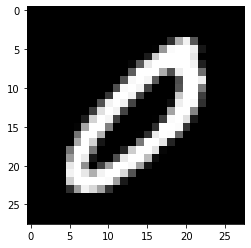

Predicted 0 
Actual


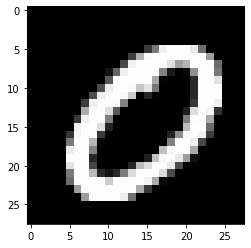

Predicted 0 
Actual


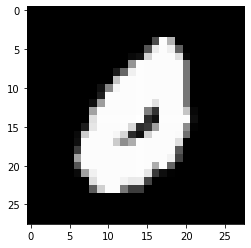

Predicted 8 
Actual


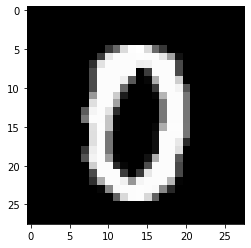

Predicted 0 
Actual


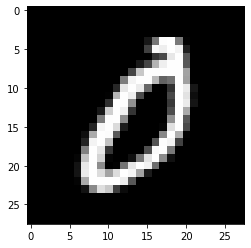

Predicted 0 
Actual


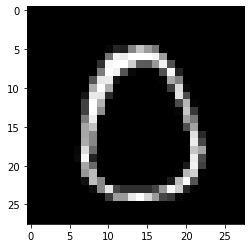

Predicted 0 
Actual


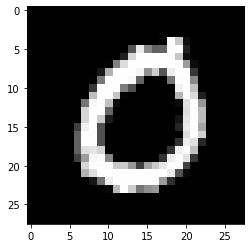

Predicted 0 
Actual


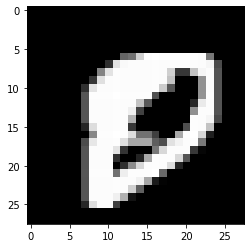

Predicted 0 
Actual


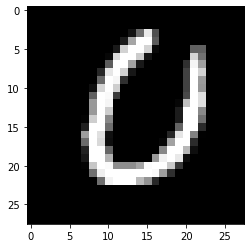

Predicted 0 
Actual


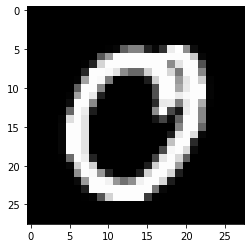

Predicted 0 
Actual


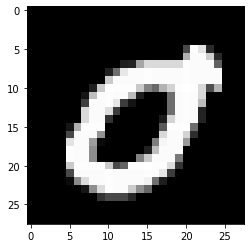

Predicted 0 
Actual


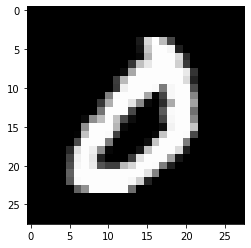

Predicted 0 
Actual


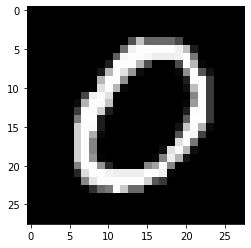

Predicted 0 
Actual


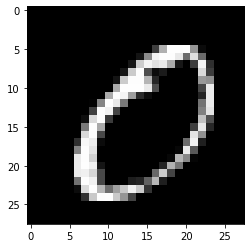

Predicted 0 
Actual


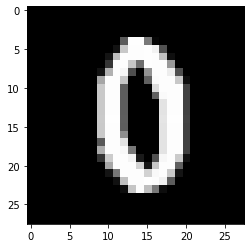

Predicted 6 
Actual


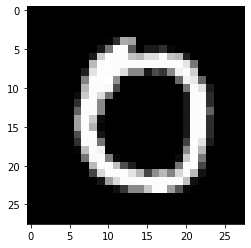

Predicted 0 
Actual


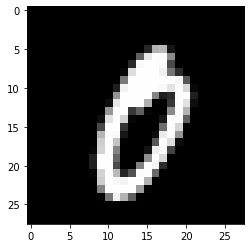

Predicted 8 
Actual


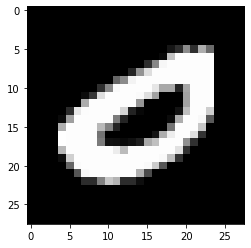

Predicted 0 
Actual


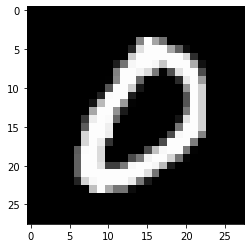

Predicted 0 
Actual


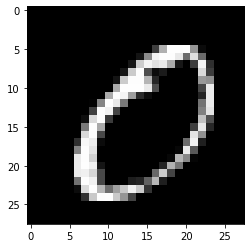

Predicted 0 
Actual


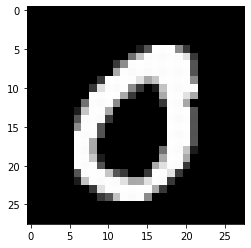

Predicted 0 
Actual


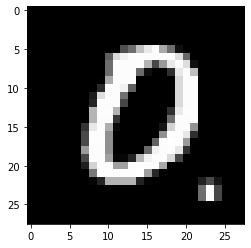

Predicted 0 
Actual


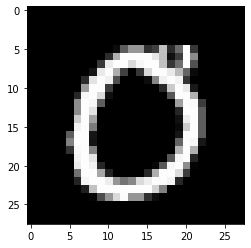

Predicted 0 
Actual


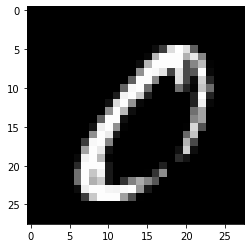

Predicted 0 
Actual


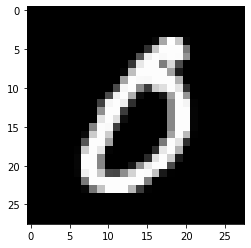

Predicted 0 
Actual


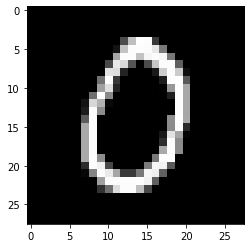

Predicted 0 
Actual


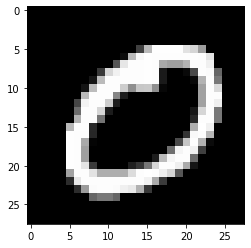

Predicted 0 
Actual


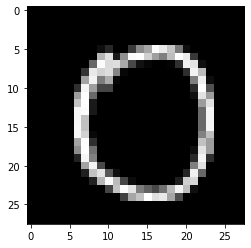

Predicted 0 
Actual


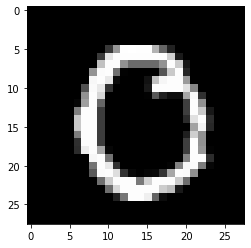

Predicted 0 
Actual


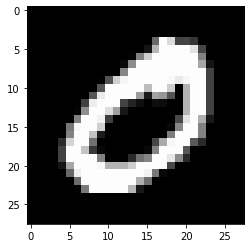

Predicted 0 
Actual


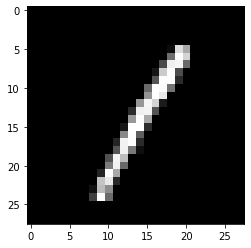

Predicted 1 
Actual


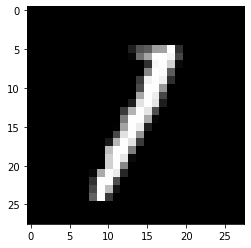

Predicted 1 
Actual


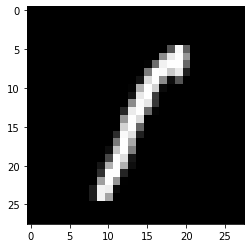

Predicted 1 
Actual


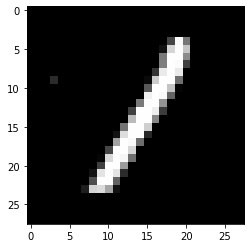

Predicted 1 
Actual


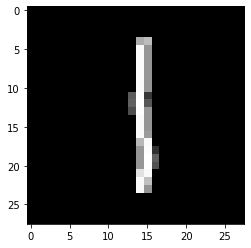

Predicted 1 
Actual


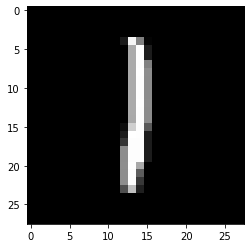

Predicted 1 
Actual


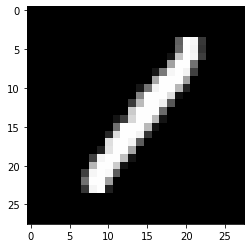

Predicted 1 
Actual


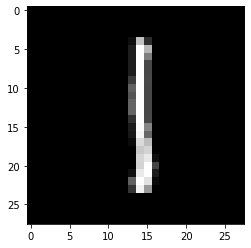

Predicted 1 
Actual


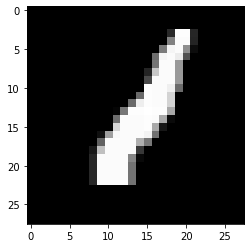

Predicted 1 
Actual


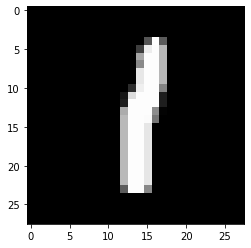

Predicted 1 
Actual


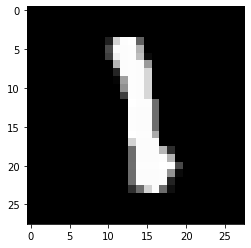

Predicted 1 
Actual


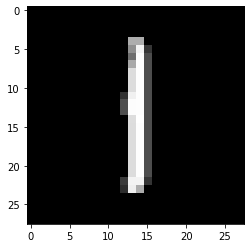

Predicted 1 
Actual


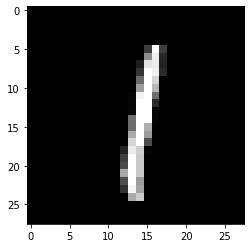

Predicted 1 
Actual


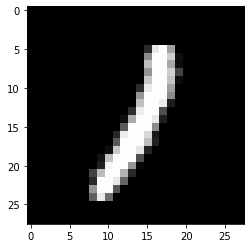

Predicted 1 
Actual


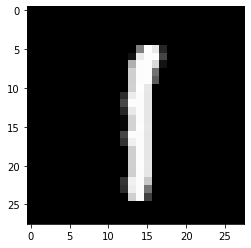

Predicted 1 
Actual


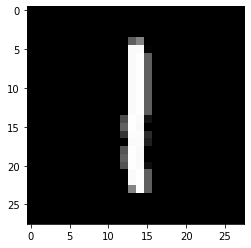

Predicted 1 
Actual


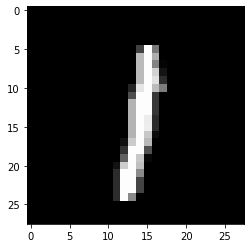

Predicted 1 
Actual


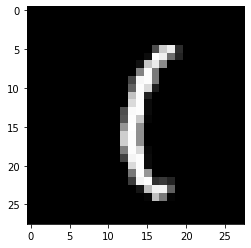

Predicted 1 
Actual


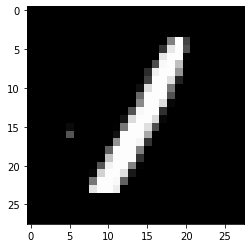

Predicted 1 
Actual


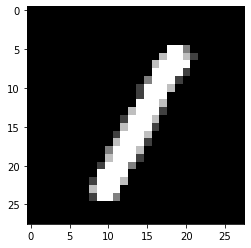

Predicted 1 
Actual


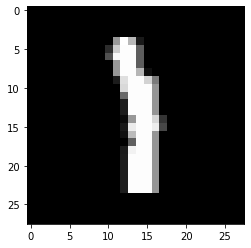

Predicted 1 
Actual


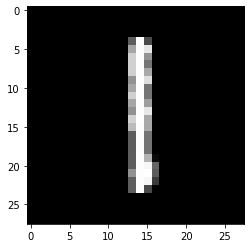

Predicted 1 
Actual


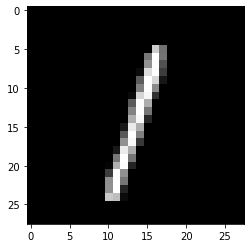

Predicted 1 
Actual


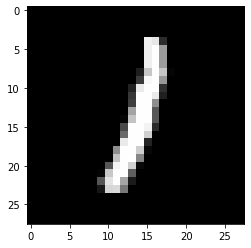

Predicted 1 
Actual


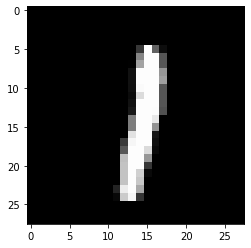

Predicted 1 
Actual


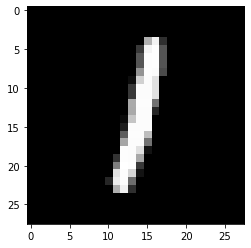

Predicted 1 
Actual


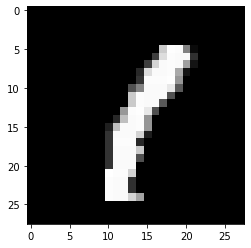

Predicted 1 
Actual


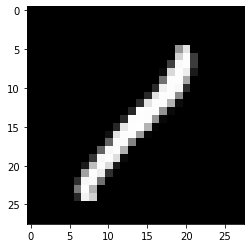

Predicted 1 
Actual


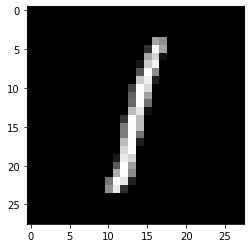

Predicted 1 
Actual


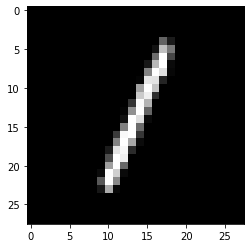

Predicted 1 
Actual


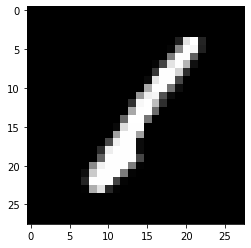

Predicted 1 
Actual


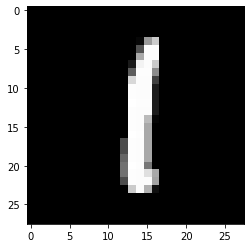

Predicted 1 
Actual


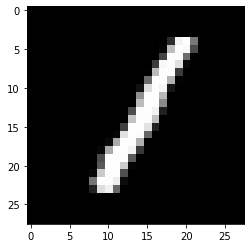

Predicted 1 
Actual


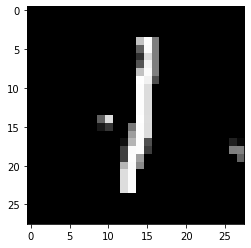

Predicted 1 
Actual


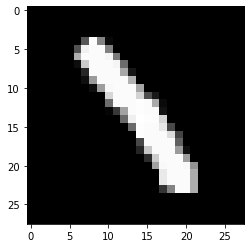

Predicted 3 
Actual


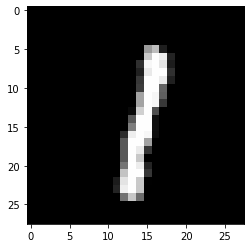

Predicted 1 
Actual


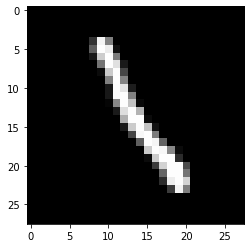

Predicted 5 
Actual


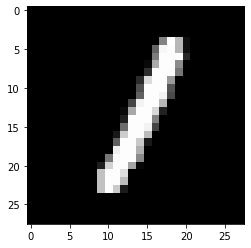

In [ ]:
for i in range(xtest.shape[1]):
    print("Actual")
    plt.imshow(xtest[:,i].reshape(28, 28), cmap = 'gray')
    plt.show()
    print("Predicted {} ".format(np.argmax(ypred[:,i], 0)))